### **Solubility Predictor**

### **Load Data**

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv")

Membuang data yang kosong dan tidak relevan

In [ ]:
df.dropna(axis=0)

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


membuat variabel bebas yang digunakan sebagai hasil prediksi

In [ ]:
y = df['logS']

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64


membuat variabel yang digunakan sebagai indikasi untuk memprediksi variabel y


In [ ]:
X = df.drop('logS', axis = 1)
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


### **Splitting training and test set**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# **Model Building**

## **Linear Regression**

### **Training the model**

In [ ]:
from sklearn.linear_model import LinearRegression
#lr = shorthand for linear regression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

LinearRegression()

### **Applying the model to make a prediction**

In [ ]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

### **Evaluate model performance**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

#test set

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [ ]:
print("LR MSE (Train) :",lr_train_mse)
print("LR R2 (Train) :",lr_train_r2)
print("LR MSE (Test) :",lr_test_mse)
print("LR R2 (Test) :",lr_test_r2)

LR MSE (Train) : 1.009472241515891
LR R2 (Train) : 0.7692295963594564
LR MSE (Test) : 1.0221891674104264
LR R2 (Test) : 0.7707918869245227


In [ ]:
lr_result = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_result.columns = ['Methods', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
lr_result

,Methods,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1.009472,0.76923,1.022189,0.770792


## **Random Forest**

### **Training the model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

### **Applying the model to make a prediction**

In [ ]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

### **Evaluate model performance**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test,y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [ ]:
print("RF MSE (Train)", rf_train_mse)
print("RF R2 (Train)", rf_train_r2)
print("RF MSE (Test)", rf_test_mse)
print("RF R2 (Test)", rf_test_r2)

RF MSE (Train) 0.0928927725080905
RF R2 (Train) 0.9787642475688186
RF MSE (Test) 0.516776238597488
RF R2 (Test) 0.8841219313336615


In [ ]:
rf_result = pd.DataFrame(['Random Forest Regressor', rf_train_mse, rf_train_r2,rf_test_mse, rf_test_r2]).transpose()
rf_result.columns = ["Methods", "Training MSE", "Training R2", "Test MSE", "Test R2"]
rf_result


,Methods,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest Regressor,0.092893,0.978764,0.516776,0.884122


In [ ]:
lr_result

,Methods,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1.009472,0.76923,1.022189,0.770792


# Model Comparison

In [ ]:
df_models = pd.concat([lr_result, rf_result], axis = 0).reset_index(drop=True)
df_models

,Methods,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1.009472,0.76923,1.022189,0.770792
1,Random Forest Regressor,0.092893,0.978764,0.516776,0.884122


# **Data visualization of prediction result**

Text(0.5, 0, 'Experimental Actual LogS')

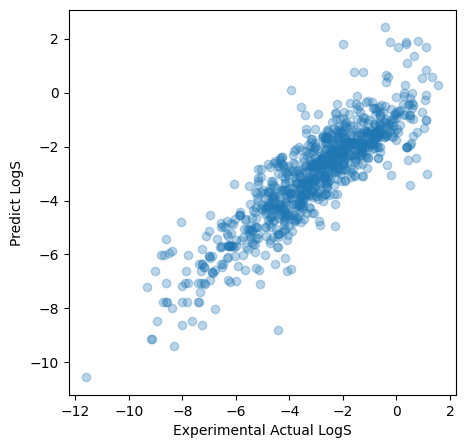

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred,alpha=0.3)
plt.plot
plt.ylabel('Predict LogS')
plt.xlabel('Experimental Actual LogS')

Text(0.5, 0, 'Experimental Actual LogS')

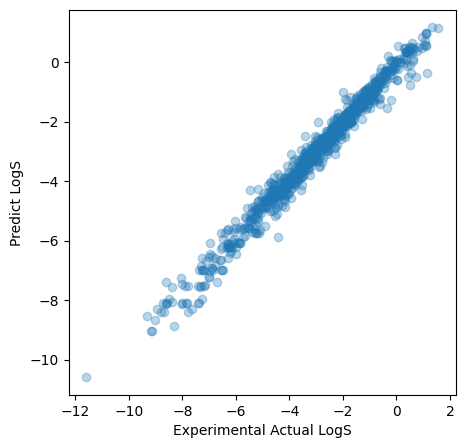

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_rf_train_pred,alpha=0.3)
plt.plot
plt.ylabel('Predict LogS')
plt.xlabel('Experimental Actual LogS')